In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras  # Upgrade to Keras 3.
!pip install -q tenserflow

In [2]:
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}


In [103]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import pandas as pd

In [ ]:
(inputs_train, labels_train), (inputs_eval, labels_eval) = keras.datasets.cifar10.load_data()

# #Normalize color values from 0 - 255 to 0 - 1
inputs_train = inputs_train / 255.0
inputs_eval = inputs_eval / 255.0

labels_train_one_hot = to_categorical(labels_train, num_classes=10)
labels_eval_one_hot = to_categorical(labels_eval, num_classes=10)

In [134]:
OPTIMIZER = keras.optimizers.Adam()
EPOCHS = 200
LOSS = "categorical_crossentropy"

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

In [ ]:
# TRAIN
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
train = datagen.flow(inputs_train,labels_train_one_hot, batch_size=64)

history = model.fit(train, epochs=EPOCHS, validation_data=(inputs_eval, labels_eval_one_hot))

In [152]:
# LOAD
model.load_weights('/content/drive/MyDrive/weights/cifar10.weights.h5')

In [ ]:
pd.DataFrame(history.history).plot()

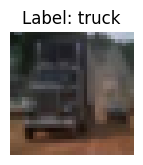

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
This is  truck


In [154]:
index = np.random.randint(0, len(inputs_eval))

pixel_size = 4
fig_size = 32 * pixel_size / 80
plt.figure(figsize=(fig_size, fig_size))

plt.imshow(inputs_eval[index], cmap='gray', interpolation='nearest')
plt.title(f'Label: {label_dict[labels_eval[index][0]]}')
plt.axis('off')
plt.show()

print("This is ", label_dict[np.argmax(model.predict(inputs_eval)[index])])

In [147]:
model.save_weights('/content/drive/MyDrive/weights/cifar10.weights.h5')